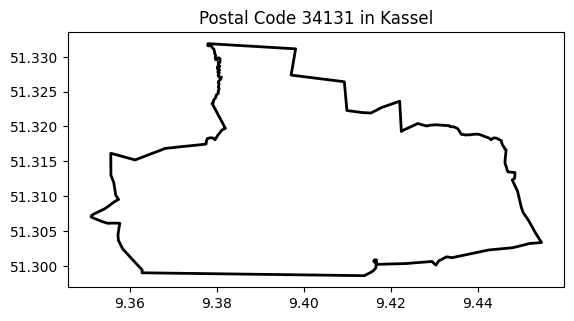

C:\Users\hamud\AppData\Roaming\Python\Python312\site-packages\jupyter_client\session.py:200: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)  # noqa


In [1]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt

def get_zip_features(place, tags):
    try:
        return ox.features_from_place(place, tags)
    except Exception as e:
        handle_error(f"Error getting features: {e}")
        return None

def handle_error(message):
    print(message)

def filter_zip_code(gdf, postal_code):
    try:
        return gdf[gdf["postal_code"] == postal_code]
    except Exception as e:
        handle_error(f"Error filtering postal code: {e}")
        return gpd.GeoDataFrame()

def plot_zip_code(zip_gdf):
    try:
        zip_gdf.boundary.plot(color="black", linewidth=2)
        plt.title(f'Postal Code {zip_gdf["postal_code"].iloc[0]} in Kassel')
        plt.gca().set_facecolor('white')
        plt.show()
    except Exception as e:
        handle_error(f"Error plotting the postal code area: {e}")

tags_zip = {"boundary": "postal_code", "postal_code": "*" }

all_zips = get_zip_features("Kassel, Germany", tags_zip)
zip_34131 = filter_zip_code(all_zips, "34131")

if not zip_34131.empty:
    plot_zip_code(zip_34131)
else:
    handle_error("No features found for the specified postal code.")
